# Exploring NEM open data

In [2]:
import os
import requests
from bs4 import BeautifulSoup

In [3]:
url_base = "http://nemweb.com.au"
url = "http://nemweb.com.au/Reports/Current"

In [4]:
test = requests.get(url)

In [5]:
soup = BeautifulSoup(test.text)

In [6]:
link_dict = {}
for link in soup.findAll('a'):
    link_dict[link.text] = url_base+link.get('href')

od_link = link_dict['Operational_Demand']
od_link

'http://nemweb.com.au/Reports/Current/Operational_Demand/'

In [7]:
od = requests.get(od_link)
soup = BeautifulSoup(od.text)

In [8]:
od_dict = {}
for link in soup.findAll('a'):
    od_dict[link.text] = url_base+link.get('href')
od_dict

{'[To Parent Directory]': 'http://nemweb.com.au/Reports/Current/',
 'ACTUAL_DAILY': 'http://nemweb.com.au/Reports/Current/Operational_Demand/ACTUAL_DAILY/',
 'ACTUAL_HH': 'http://nemweb.com.au/Reports/Current/Operational_Demand/ACTUAL_HH/',
 'ACTUAL_UPDATE': 'http://nemweb.com.au/Reports/Current/Operational_Demand/ACTUAL_UPDATE/',
 'FORECAST_HH': 'http://nemweb.com.au/Reports/Current/Operational_Demand/FORECAST_HH/'}

In [9]:
ad_link = od_dict['ACTUAL_DAILY']
ad = requests.get(ad_link)
soup = BeautifulSoup(ad.text)

In [14]:
ad_dict = {}
for link in soup.findAll('a'):
    k = link.text.split('_')[-1][:-4]
    ad_dict[k] = url_base+link.get('href')
zip_link = ad_dict['20200203044000']
zip_link

'http://nemweb.com.au/Reports/Current/Operational_Demand/ACTUAL_DAILY/PUBLIC_ACTUAL_OPERATIONAL_DEMAND_DAILY_20200202_20200203044000.zip'

In [15]:
from io import BytesIO
from zipfile import ZipFile

In [16]:
r = requests.get(zip_link)

In [20]:
zf = ZipFile(BytesIO(r.content))
zf.extractall()

In [23]:
zf.namelist()

['PUBLIC_ACTUAL_OPERATIONAL_DEMAND_DAILY_20200202_20200203044000.CSV']

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#df = pd.read_csv(zf.open(zf.namelist()[0]), skiprows=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 8 columns):
I                       241 non-null object
OPERATIONAL_DEMAND      241 non-null object
ACTUAL                  241 non-null object
1                       240 non-null float64
REGIONID                240 non-null object
INTERVAL_DATETIME       240 non-null object
OPERATIONAL_DEMAND.1    240 non-null float64
LASTCHANGED             240 non-null object
dtypes: float64(2), object(6)
memory usage: 15.2+ KB


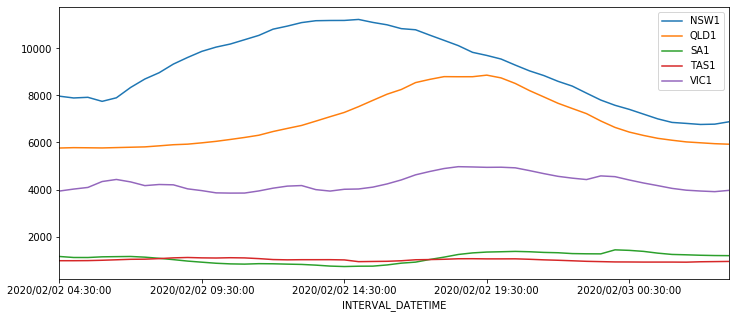

In [37]:
df.set_index('INTERVAL_DATETIME', inplace=True)
df.groupby('REGIONID')['OPERATIONAL_DEMAND.1'].plot(legend=True, figsize=(12,5))
plt.show()